### The Linear Regression File 

#### questions to answer:
##### how many classes do ew need for each feature (currency) analysis

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [59]:
# test_list = ['first', 'second', 'third']
# final_dict = {}
# for i, element in enumerate(test_list):
# 	g = {'x' : i*i, 'y' : i+1}
# 	final_dict[element] = g
# print(final_dict)
# print(final_dict['second']['y'])
##############################################################################################################
arr = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
X = np.array([arr + (arr[-1]*i) for i in range(len(arr) - 2)])

def generate_y(array, horizon):
    close = array[:,4] ### 1)
    return close[horizon:] ### 2)


horizon = 7
G = X[:-horizon]
y = generate_y(X,horizon)

X_shape = X.shape
y_shape = y.shape

print(G.shape)
print(y_shape)


# # print(X)
# print(f'X.shape : {X.shape}')

# print('--'*25)

# horizon = 7
# G = X[:, :-horizon]
# # G = X
# J = G[:,4]

# print('--'*25)
# print(G)
# print(G.shape)
# print('--'*25)
# print(J)
# print(J.shape)
# print('--'*25)

# print('--'*25)

##############################################################################################################
# number of days since start | open | high | low | close | sma(10 days) | golden cross | death cross
#          0                 |  1   |  2   |  3  |   4   |      5       |      6       |      7

(3, 12)
(3,)


In [60]:
import preprocess
files = preprocess.potential_files[:5]

preprocess_class_instantiation = preprocess.preprocess(files, 7)

datasets = preprocess_class_instantiation.generate_data()

file_for_given_row = {}
for index, crypto_name in enumerate(files):
    file_for_given_row[crypto_name] = index
    # if crypto_name == '1INCH.csv':
    # print(f'index : {index} -- crypto_name : {crypto_name}')

# for key, val in file_for_given_row.items():
#     print(key, val)
    

# print(file_for_given_row['1INCH.csv'])

for f in files:
    print(f"https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices?resource=download&select={f}")



# print(datasets)

processing files
Loading 1INCH.csv...
Loading AAVE.csv...
Loading ADA.csv...
Loading ALGO.csv...
Loading AMP.csv...
The columns are: (number of days since start,open,high,low,close,sma(10 days),golden cross, death cross)
https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices?resource=download&select=1INCH.csv
https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices?resource=download&select=AAVE.csv
https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices?resource=download&select=ADA.csv
https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices?resource=download&select=ALGO.csv
https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices?resource=download&select=AMP.csv


In [61]:

for row, X_array in enumerate(datasets):
#     # 0 is X
#     # 1 is y
#     print(f'{X_array}')
    print(f'{datasets[row][0]} -- {X_array}')
# #     print(f'{datasets[row][0]} --')
# #     print('--'*50)

# for i in datasets:
    # print(i)
    

[[0 2.305 2.345 ... 2.2802857142857142 0 0]
 [1 2.224 2.41 ... 2.302571428571428 0 0]
 [2 2.343 2.436 ... 2.327285714285714 0 0]
 ...
 [1522 0.175225 0.176541 ... 0.18129099999999998 0 0]
 [1523 0.165636 0.185397 ... 0.1808042857142857 0 0]
 [1524 0.184681 0.202833 ... 0.18075942857142857 0 0]] -- (array([[0, 2.305, 2.345, ..., 2.2802857142857142, 0, 0],
       [1, 2.224, 2.41, ..., 2.302571428571428, 0, 0],
       [2, 2.343, 2.436, ..., 2.327285714285714, 0, 0],
       ...,
       [1522, 0.175225, 0.176541, ..., 0.18129099999999998, 0, 0],
       [1523, 0.165636, 0.185397, ..., 0.1808042857142857, 0, 0],
       [1524, 0.184681, 0.202833, ..., 0.18075942857142857, 0, 0]],
      dtype=object), array([2.792, 2.936, 2.809, ..., 0.20116, 0.196268, 0.189583],
      dtype=object))
[[0 448.49 485.36 ... 474.1985714285714 0 0]
 [1 481.02 482.68 ... 476.2614285714285 0 0]
 [2 453.37 469.78 ... 476.39571428571423 0 0]
 ...
 [1612 165.9705 167.7689 ... 170.1463 0 0]
 [1613 154.3982 163.4746 ... 1

In [62]:
##### NESTED DICTIONARY RETRIEVAL OF X FOR GIVEN CURRENCY ##################################################################################
# filename = '1INCH.csv'
# print(f"observing X for {filename} :\n{datasets[filename]['X']}\n")

# print(type(datasets[filename]['X']))
# g = datasets[filename]['X']
# print(g.shape)
#######################################################################################

##### NESTED LIST RETRIEVAL OF X FOR GIVEN CURRENCY ##################################################################################
# filename = '1INCH.csv'


def get_X_or_y_for_given_currency(currency, x_or_y):
    processed_file_dict = {}

    if (x_or_y == 'X') or (x_or_y == 'x'):
        x_or_y = 0
    elif (x_or_y == 'Y') or (x_or_y == 'y'):
        x_or_y = 1
    else:
        print(f'x_or_y needs to be x or y')
    
    row = file_for_given_row[currency]
    
    for csv_name, row in file_for_given_row.items():
        if currency == csv_name:
            processed_file_dict[csv_name] = datasets[row][x_or_y]
            return processed_file_dict[csv_name]
    
    
            
# get_X_or_y_for_given_currency(filename, 'X')
# get_X_or_y_for_given_currency(filename, 'y')

        
    
#######################################################################################

In [63]:
##### THIS IS THE CELL THAT I AM HAVING ISSUES WITH #####
# test_data = np.random.randint(0,30,size=(14,13))
###########################################################################
# X = None
# y = None
# currency_we_want_to_look_at = '1INCH.csv'
# for key, value in datasets.items():
# 	if key == currency_we_want_to_look_at:
# 		X = datasets[key]['X']
# 		y = datasets[key]['y']
# 		# print(f'key : {key}\n{X}')
# print(X.shape)
# print('--'*50)
# print(y.shape)
###########################################################################
currency_we_want_to_look_at = 'AAVE.csv'

X = get_X_or_y_for_given_currency(currency_we_want_to_look_at, 'X')
y = get_X_or_y_for_given_currency(currency_we_want_to_look_at, 'y')

print(X.shape)
print(y.shape)

# print("first row of X:", X[0])
# print("first 10 closes from X[:,4]:", X[:10, 4])
# print("first 10 y values:", y[:10])


(1615, 8)
(1615,)


# underfitted example of the first feature for a given dataset 

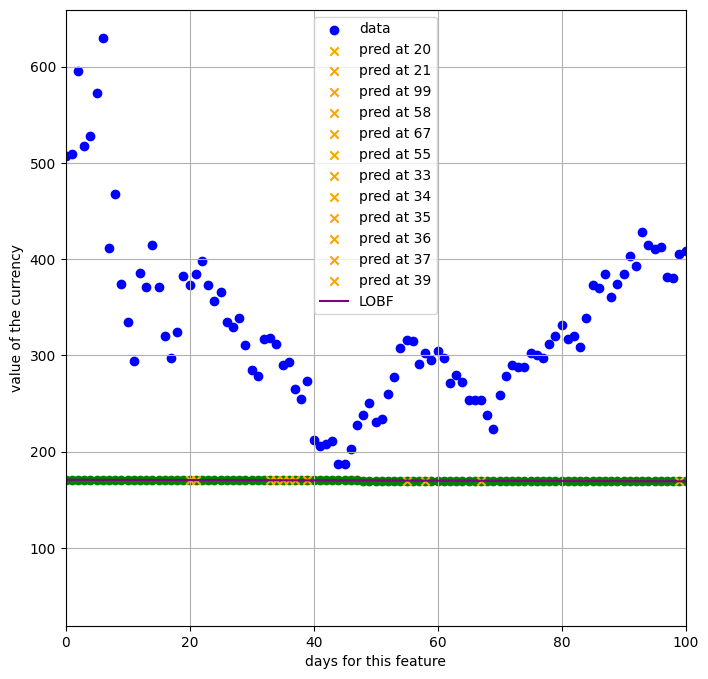

In [64]:

X0 = X[:, [0]] ## number of days since start
# X0 = X
pred_x_at_this_point = [20, 21, 99, 58, 67, 55, 33, 34, 35, 36, 37, 39]
lin_reg_model = LinearRegression()

lin_reg_model.fit(X0, y)
y_pred = lin_reg_model.predict(X0)


fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111)

ax.scatter(X0, y, color='blue', alpha=1, label='data')

ax.scatter(X0,y_pred, color='green')

for i in pred_x_at_this_point:
	y_pred_new_x = lin_reg_model.predict(np.array([[i]]))
	ax.scatter(i, y_pred_new_x, color='orange', marker='x', label=f'pred at {i}')

# for x_value, y_value in zip(X0[:, 0], y_pred):
#     # print(f'(x_value, y_value) : ({x_value}, {y_value})')
#     ax.annotate(f'({x_value}, {y_value})', (x_value,y_value), textcoords='offset fontsize', xytext=(2,1), fontsize=8, color='green')
    
# for x_value, y_value in zip(X0[:, 0], y):
#     # print(f'(x_value, y_value) : ({x_value}, {y_value})')
#     ax.annotate(f'({x_value}, {y_value})', (x_value,y_value), textcoords='offset fontsize', xytext=(1,1), fontsize=8, color='blue')
ax.set_xlim(0,100)
ax.plot(X0, y_pred, color='purple', label='LOBF')

# for i in range(len(X0)):
#     ax.arrow(X0[i, 0],y_pred[i],0,y[i]-y_pred[i], length_includes_head=True, color='red')

ax.set_xlabel('days for this feature')
ax.set_ylabel('value of the currency')
ax.legend()
ax.grid()
#################################################################################################################################

In [65]:
# # code based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html


# def true_fun(X):
#     return np.cos(1.5 * np.pi * X)

# np.random.seed(0)   

# n_samples = 30
# degrees = [1, 4, 15]

# # X = np.sort(np.random.rand(n_samples))
# # # print(X)
# # y = true_fun(X) + np.random.randn(n_samples) * 0.1
# # print(y)

# plt.figure(figsize=(14, 5))
# for i in range(len(degrees)):
#     ax = plt.subplot(1, len(degrees), i + 1)
#     plt.setp(ax, xticks=(), yticks=())

#     polynomial_features = PolynomialFeatures(degree=degrees[i],
#                                              include_bias=False)
#     linear_regression = LinearRegression()
#     pipeline = Pipeline([("polynomial_features", polynomial_features),
#                          ("linear_regression", linear_regression)])
#     pipeline.fit(X[:, np.newaxis], y)

#     Xs = np.linspace(0, 1, 100)
#     plt.plot(Xs, pipeline.predict(Xs[:, np.newaxis]), label="Model")
#     # print(f'---{pipeline.predict(Xs[:, np.newaxis])}---')
    
#     plt.plot(Xs, true_fun(Xs), label="True function")
    
#     plt.scatter(X, y, edgecolor='b', s=30, alpha=0.7,label="Training data")
# ##66666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666
#     for j in range(n_samples):
#         # Format the coordinates to two decimal places
#         label = f'({X[j]:.2f}, {y[j]:.2f})'
#         # Add a slight offset to the y-coordinate to place the label above the dot
#         plt.text(X[j], y[j] + 0.08, label, fontsize=8, ha='center', color='red')
# ##66666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.xlim((0, 1))
#     plt.ylim((-2, 2))
#     plt.legend(loc="best")
#     plt.title("Degree {}".format(degrees[i]))
    
    
    
    
# y_bad = y.copy()
# y_bad[3] = -90

# model1 = LinearRegression()
# model1.fit(x[:, np.newaxis], y)

# model2 = LinearRegression()
# model2.fit(x[:, np.newaxis], y_bad)

# xs = np.linspace(0, 10, 1000)
# ys1 = model1.predict(xs[:, np.newaxis])
# ys2 = model2.predict(xs[:, np.newaxis])

# plt.figure(figsize=(4, 3))
# plt.scatter(x, y_bad, alpha=0.5, color='green')
# plt.scatter(x[3], y_bad[3], alpha=0.5, color='red')  ##<------ had to ask about this
# plt.plot(xs, ys1, color='blue', label='model without outlier')
# plt.plot(xs, ys2, color='purple', linestyle='-.', label='model WITH outlier')


# Multivariable Linear Regression Section
### 1) find the most sig weihts (features) and dicuss what that means
### 2) get the LOBF to be fitted to the data trajectory
### 3) discuss various errors measured against the data and what that tells us about the real values vs our pred values

In [66]:
# ## number of days since start | open | high | low | close | sma(10 days) | golden cross | death cross
# ##          0                 |  1   |  2   |  3  |   4   |      5       |      6       |      7

### find the magnitue and sign of coefficients

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### NOTE: instantiate Ridge class
lin_reg_model = Ridge()

### NOTE: fit the model (the obj) to the train of the lables and the dataset
lin_reg_model_train = lin_reg_model.fit(X_train, y_train)
### NOTE: make prediction lables for the train set
y_pred_train = lin_reg_model.predict(X_train)###########################################
### NOTE: make prediction lables for the test set
y_pred_test = lin_reg_model.predict(X_test)###########################################

### NOTE: get the MAE that measures the training lables against the predicted training labels
train_MAE = mean_absolute_error(y_train, y_pred_train)
### NOTE: get the MAE that measures the test lables against the predicted test labels
test_MAE = mean_absolute_error(y_test, y_pred_test)

naive_MAE = mean_absolute_error(y_test, np.full(y_test.shape, np.mean(y_train)))###########################################

print(train_MAE)
print(test_MAE)
print(naive_MAE)

18.28854537260313
17.359920840595674
80.94886982574583


In [68]:
y_pred_train_shape = y_pred_train.shape[0]
y_pred_test_shape = y_pred_test.shape[0]

print(y_pred_train_shape)
print(y_pred_test_shape)

x_axis_train = np.linspace(0, y_pred_train_shape, y_pred_train_shape)
x_axis_test = np.linspace(0, y_pred_test_shape, y_pred_test_shape)

print(x_axis_train.shape)
print(x_axis_test.shape)

1130
485
(1130,)
(485,)


In [69]:
w = lin_reg_model_train.coef_
b = lin_reg_model_train.intercept_

print(w)
# print(b)

# ## number of days since start | open | high | low | close | sma(10 days) | golden cross | death cross

feature_names = ['number_of_days_since_start', 'open', 'high', 'low', 'close', 'sma(10_days)', 'golden_cross', 'death_cross']

max_coefficient = 0
most_influential_feature_name = 0
for feature_names, coefficients in zip(feature_names, w):
    if coefficients > max_coefficient:
        max_coefficient = coefficients
        most_influential_feature_name = feature_names
print(f'most_influential_feature_name : {most_influential_feature_name} -- max_coefficient : {max_coefficient}')

[ 1.38916555e-03  1.02838865e-01 -3.10953617e-01  2.67166445e-01
  5.92267493e-01  3.20320476e-01  2.34560514e+01  1.29790356e+01]
most_influential_feature_name : golden_cross -- max_coefficient : 23.456051416783033


### get a function that fits the line better 

In [70]:
feature_indecies = [1,2,3,4,5,6,7]
print(X[:, feature_indecies].shape)
# print(X[:len(y), feature_indecies].shape)
# print(y.shape)

(1615, 7)


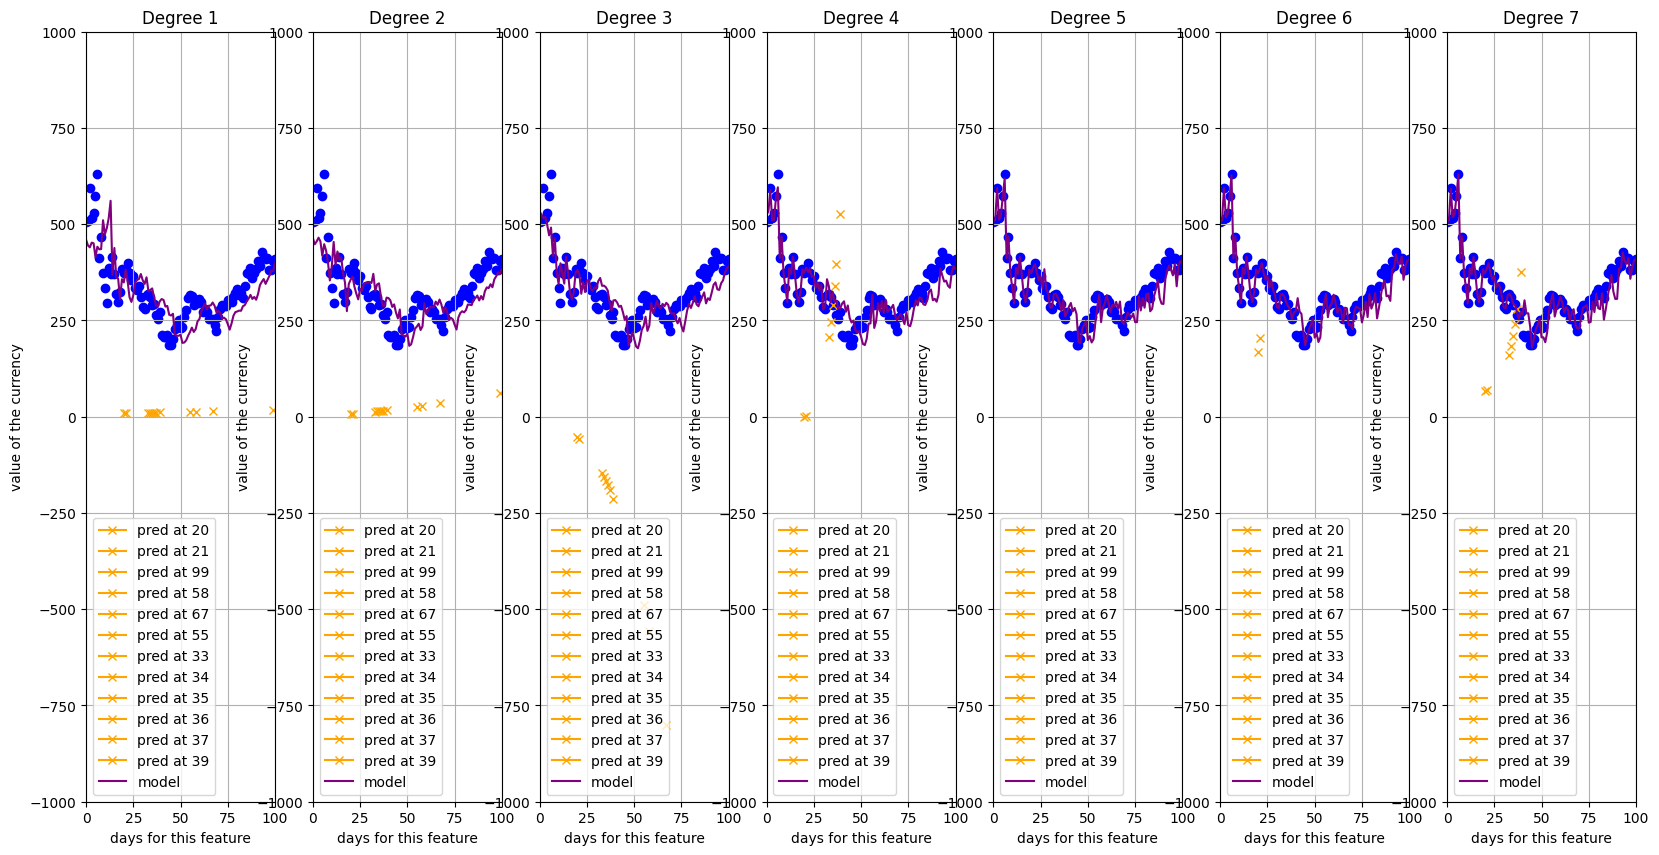

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_degrees = [1,2,3,4,5,6,7]
feature_indecies = [1,2,3,4,5,6,7]
pred_x_at_this_point = [20, 21, 99, 58, 67, 55, 33, 34, 35, 36, 37, 39]

plt.figure(figsize=(20,10))
for i in range(len(polynomial_degrees)):
    ax = plt.subplot(1, len(polynomial_degrees), i + 1)
    
    ### NOTE: make the line eq a mutlti-var lin eq
    polynomial_features = PolynomialFeatures(degree=polynomial_degrees[i], include_bias=False)
    
    ### NOTE: apply lin reg to the new mutlti-var lin eq
    linear_regression_model = LinearRegression()
    
    ### NOTE: instantiate the pipline
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression_model)])
    
    ### NOTE: apply the pipline
    pipeline.fit(X[:, feature_indecies], y)
    
    for h in pred_x_at_this_point:
        y_pred_at_this_point = pipeline.predict(np.array([[h]+[0]*6]))[0]##now a 2d array with 7 features
        ax.plot(h, y_pred_at_this_point, marker='x', color='orange', label=f"pred at {h}")
        
    
    
    plt.xlabel('x')
    plt.ylabel('y')
    ax.scatter(X0, y, color="blue")
    # ax.scatter(X_train, y_train, color="green", label='trian')
    # ax.scatter(X_train, y_train, color="red", label='test')
    ax.set_xlim(0,100)
    ax.set_ylim(-1000,1000)
    
    ax.plot(X0, pipeline.predict(X[:, feature_indecies]), label="model", color="purple")
    
    ax.set_xlabel('days for this feature')
    ax.set_ylabel('value of the currency')
    plt.title(f"Degree {polynomial_degrees[i]}")
    ax.legend()
    ax.grid() 
        

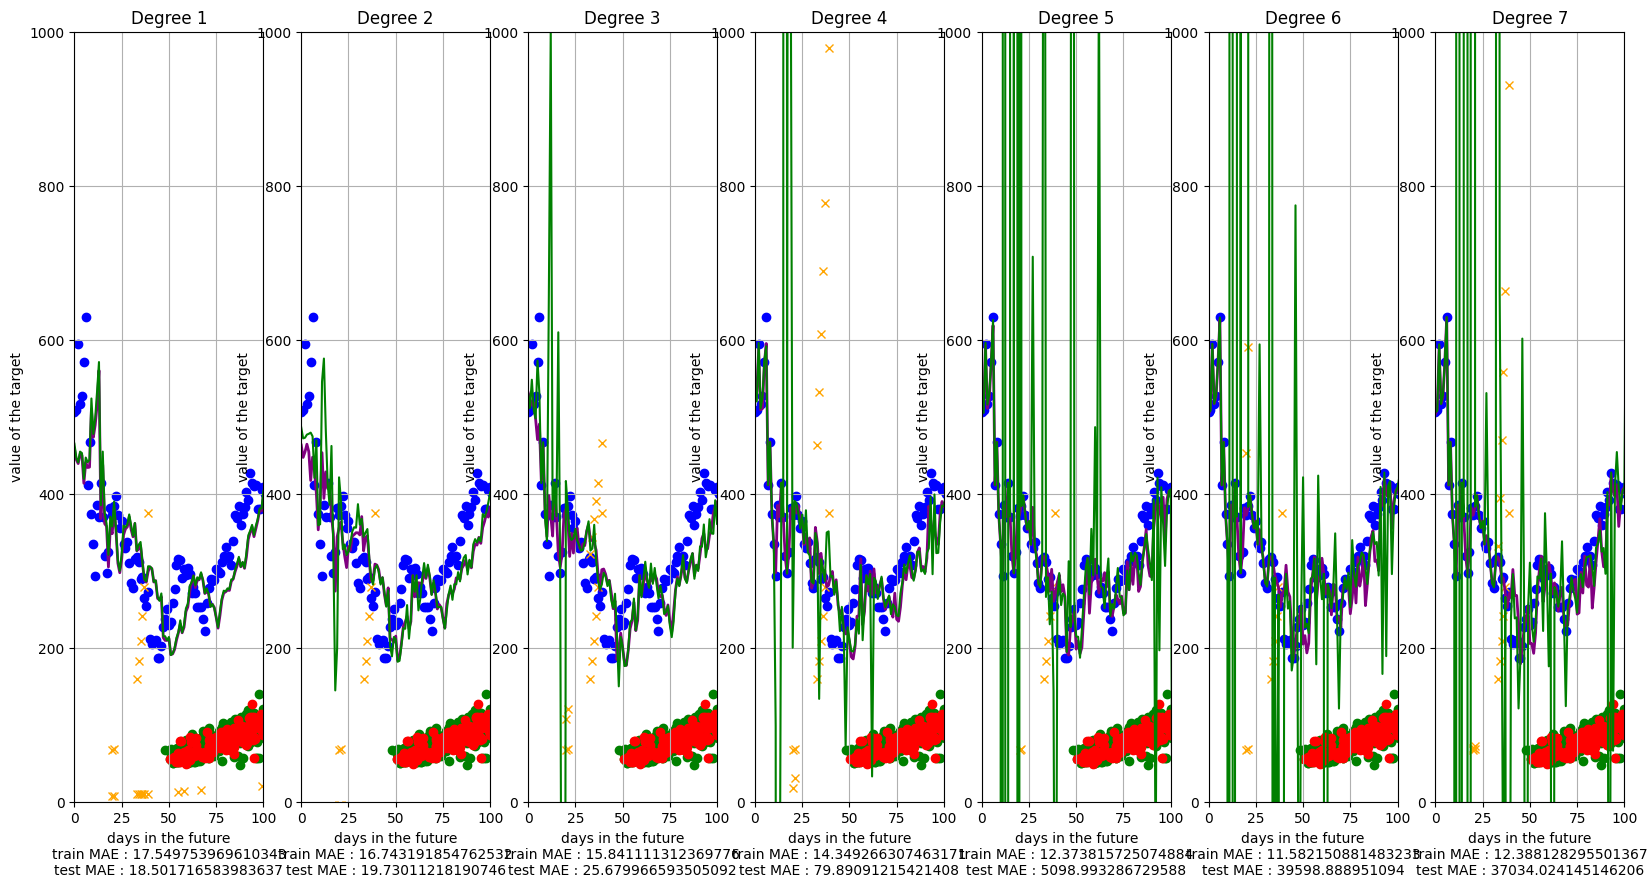

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_degrees = [1,2,3,4,5,6,7]
feature_indecies = [1,2,3,4,5,6,7]
pred_x_at_this_point = [20, 21, 99, 58, 67, 55, 33, 34, 35, 36, 37, 39]

plt.figure(figsize=(20,10))
for i in range(len(polynomial_degrees)):
    # print(X[:, feature_indecies].shape)
    # print(y.shape)
    
    ax = plt.subplot(1, len(polynomial_degrees), i + 1)
    
    ### NOTE: make the line eq a mutlti-var lin eq
    polynomial_features1 = PolynomialFeatures(degree=polynomial_degrees[i], include_bias=False)
    polynomial_features_train = PolynomialFeatures(degree=polynomial_degrees[i], include_bias=False)
    
    ### NOTE: apply lin reg to the new mutlti-var lin eq
    linear_regression_model1 = LinearRegression()
    linear_regression_model_train = LinearRegression()
    
    ### NOTE: instantiate the pipline
    pipeline1 = Pipeline([("polynomial_features", polynomial_features1), ("linear_regression", linear_regression_model1)])
    pipeline_on_training_data = Pipeline([("polynomial_features", polynomial_features_train), ("linear_regression", linear_regression_model_train)])
    
    ### NOTE: apply the pipline
    pipeline1.fit(X[:, feature_indecies], y)
    
    for h in pred_x_at_this_point:
        y_pred_at_this_point = pipeline.predict(np.array([[h]+[0]*6]))[0]##now a 2d array with 7 features
        ax.plot(h, y_pred_at_this_point, marker='x', color='orange', label=f"pred at {h}")
    
    ##spilt 
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X[:, feature_indecies], y, test_size=0.3, random_state=67)

    ##fit 
    pipeline_on_training_data.fit(X_train2, y_train2)
    
    ##predict on train and test
    y_pred_train2 = pipeline_on_training_data.predict(X_train2)
    y_pred_test2 = pipeline_on_training_data.predict(X_test2)
    
    train_MAE2 = mean_absolute_error(y_train2, y_pred_train2)
    test_MAE2 = mean_absolute_error(y_test2, y_pred_test2)
    
    for h in pred_x_at_this_point:
        y_pred_at_this_point = pipeline_on_training_data.predict(np.array([[h]+[0]*6]))[0]##now a 2d array with 7 features
        ax.plot(h, y_pred_at_this_point, marker='x', color='orange', label=f"pred at {h}")
        
    plt.xlabel('x')
    plt.ylabel('y')
    ax.scatter(X0, y, color="blue")
    # ax.scatter(X_train2[:,0], y_train2, color="green", label='trian')
    ax.scatter(X_test2[:,0], y_test2, color="red", label='test')
    ax.set_xlim(0,100)
    ax.set_ylim(0,1000)
    ax.plot(X0, pipeline1.predict(X[:, feature_indecies]), label="model trained on all data", color="purple", linewidth=2)
    ax.plot(X0, pipeline_on_training_data.predict(X[:, feature_indecies]), label="model trained on training data", color="green")
    
    ax.set_xlabel(f'days in the future\ntrain MAE : {train_MAE2}\ntest MAE : {test_MAE2}')
    ax.set_ylabel('value of the target')
    # ax.legend()
    plt.title(f"Degree {polynomial_degrees[i]}")
    ax.grid()   

In [73]:
print(X.shape[0])
print(y.shape)

1615
(1615,)


### show MAE, MSE, and RMSE and explain what this means for the predictions of the selected feature

#### * high train error, high test error --> underfitting
#### * low train error, high test error --> overfitting
#### * low train error, low test error --> well fitted